# The different ways to model epistasis

There are few different ways to model epistasis, as discussed in this Arxiv [paper](http://arxiv.org/abs/1502.00726) by F. Poelwijk, V. Krishna, R. Ranganathan. Their differences lie in selecting an appropriate reference sequence to establish the model's coordinate system. We must recognize that our estimates will always depend on this reference state, so its important to choose a meaningful state. For example, to an evolutionary biologists, this state might intuitively be the ancestral sequence in the space.

In [1]:
# Initial imports for the notebook. 
%matplotlib inline
import matplotlib.pyplot as plt
from epistasis.artificial import ArtificialMap
from epistasis.plotting import epistasis_bar

## Simulate a genotype-phenotype map

Use the epistasis model to generate an artifical genotype-phenotype map.

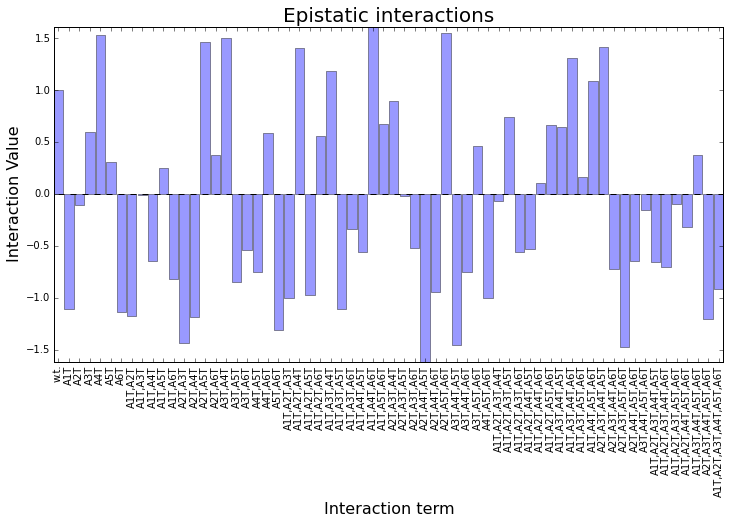

In [2]:
length = 6 # sequence length
order = 6  # order of epistasis in map

# build artificial map from random epistatic terms
gpm = ArtificialMap(6,6)
# Get necessary input items for model fitting
wildtype, genotypes, phenotypes, order = gpm.model_input()
# plot the epistatic contributions.
fig, ax = epistasis_bar(gpm, string_labels=True)      

# Three main types of models

In [3]:
from epistasis.models import LocalEpistasisModel, GlobalEpistasisModel, ProjectedEpistasisModel

## 1. Local epistasis model

The first model we show here is called the **local epistasis model** (by Poelwijk et. al.). The reference state is anchored to a single *wildtype* sequence in the genotype-phenotype map and all phenotypes are normalized to this sequence. This is useful to an evolutionary biologist, where choosing the ancestral sequence is the intuitive reference. In this case, mutational effects and epistasis are calculated deviations in phenotype as we mutate away from the ancestor.

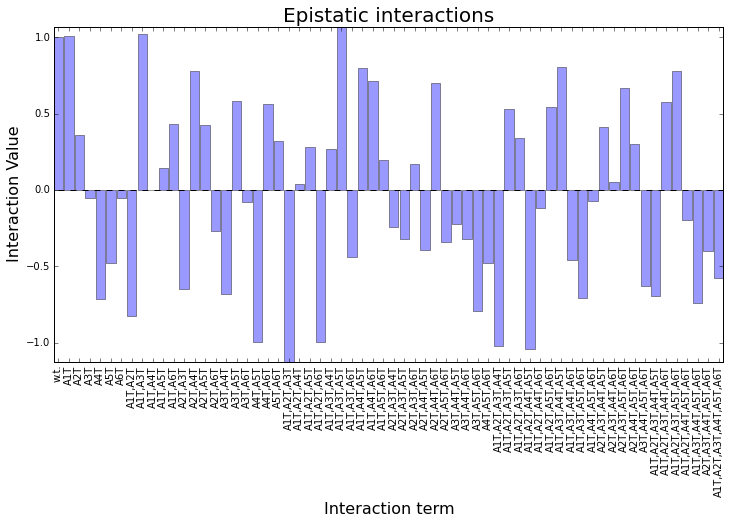

In [4]:
# Initialize the model
localgpm = LocalEpistasisModel(wildtype, genotypes, phenotypes)
# Compute the interaction terms
localgpm.estimate_interactions()
# Plot the results
fig, ax = epistasis_bar(localgpm, string_labels=True)

## 2. Global epistasis model 

In this model, the reference state is a pseudo-phenotype value calculated from the average of all phenotypes. This model avoids choosing a subjective reference sequence, and instead, anchors itself to this background independent averaged phenotype.

There is a transformation between this model and the local epistasis model (not surprisingly, since we are only changing reference state). This transformation is the discrete Fourier transform of the local epistasis model; more specifically, it is the *Hadamard tranformation* made up of *Walsh polynomials*. 

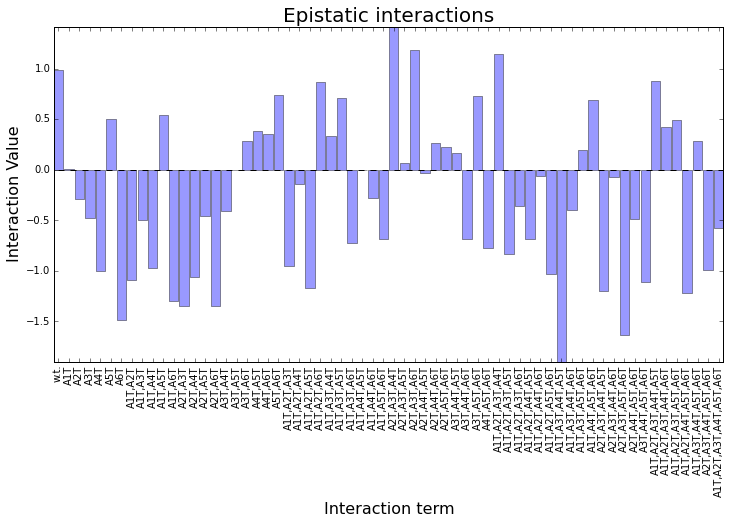

In [5]:
# Initialize the model
globalgpm = GlobalEpistasisModel(wildtype, genotypes, phenotypes)
# Compute the interaction terms
globalgpm.estimate_interactions()
# Plot the results
fig, ax = epistasis_bar(globalgpm, string_labels=True)

## 3. Projected Epistasis model

This model is a truncated version of the local epistasis model. It assumes that higher order epistasis is small in magnitude and, therefore, does not include those coupling terms in its estimation of epistasis. This model uses a regression to project the genotype-phenotype map into this low order epistasis model.

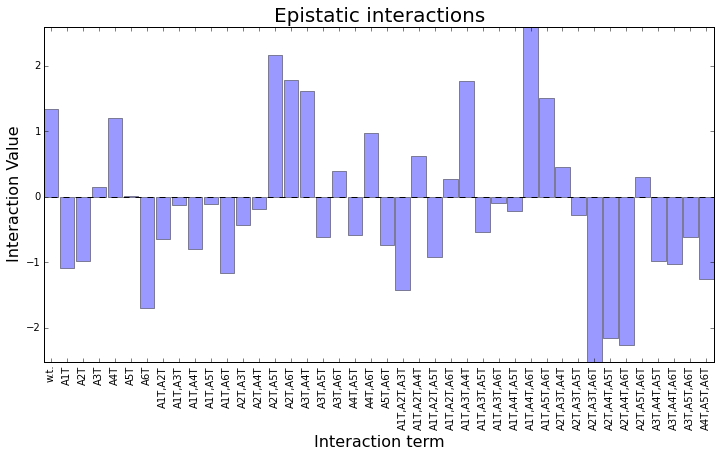

In [5]:
# Initialize the model with up to 3rd order terms.
projectedgpm = ProjectedEpistasisModel(wildtype, genotypes, phenotypes, regression_order=3)
# Compute the interaction terms
projectedgpm.estimate_interactions()
# Plot the results
fig, ax = epistasis_bar(projectedgpm, string_labels=True)